In [147]:
#importing necessary libraries
#data analysis/manipulation
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import (
    datetime,
    time,
)
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.api import adfuller
from sklearn.datasets import make_blobs
import ta.volatility as ta
import os
pd.core.common.is_list_like = pd.api.types.is_list_like
#import quandl
import pandas_datareader.data as web
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs
from arch import arch_model

import datetime

import matplotlib as mpl
import warnings

warnings.filterwarnings(action='once')
sns.set()

In [148]:
#pip install ta

In [149]:
stocks = pd.read_csv('stocks.csv')

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,11,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [150]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295226 entries, 0 to 295225
Data columns (total 24 columns):
Unnamed: 0             295226 non-null int64
apertura               295226 non-null float64
asset                  295226 non-null object
cant_nominal_compra    295226 non-null int64
cant_nominal_venta     295226 non-null int64
cant_operaciones       295226 non-null int64
cierre_ant             295226 non-null float64
created                295226 non-null object
estado                 295226 non-null object
hora_cotizacion        295226 non-null object
id                     295226 non-null int64
marca_EX               295226 non-null object
maximo                 295226 non-null float64
minimo                 295226 non-null float64
monto_operado_pesos    295226 non-null int64
precio_compra          295226 non-null float64
precio_venta           295226 non-null float64
tendencia              124549 non-null object
ticker                 295226 non-null object
ultimo         

In [151]:
db = stocks.drop(columns=["id", "updated", "asset", "estado", "marca_EX","cant_operaciones", "Unnamed: 0", "tendencia", "variacion"])
db['created'] = pd.to_datetime(db['created']).dt.date

get_date_and_time = lambda x: datetime.combine(x["created"], datetime.strptime(x["hora_cotizacion"][:7], "%H:%M:%S").time())
db["tradetime"] = db.apply(get_date_and_time, axis=1)

AttributeError: ("module 'datetime' has no attribute 'combine'", 'occurred at index 0')

In [ ]:
db.isnull().sum()

El modelo inicial selecciona un subconjunto de acciones. Empezamos por las bancarias. También nos limitamos a liquidaciones en 48hs para poder despreocuparnos momentaneamente de problemas de liquidación.

In [ ]:
db["ticker"].unique()

In [ ]:
bancos=['BBAR', 'BMA', 'BYMA', 'GGAL', 'SUPV', 'VALO', 'BHIP', 'BPAT', 'BRIO']

In [ ]:
db = db[db["ticker"].isin(bancos)]

In [ ]:
db = db[db["vencimiento"] == 48]

In [ ]:
db.head()

Genero un diccionario de DF para analizar el comportamiento de todas las acciones de forma individual.

In [ ]:
banks = {}
for bank in bancos:
    banks[bank] = db[(db["ticker"] == bank) & (db["ultimo"] != 0)]

In [ ]:
#Creating a figure to plot on
plt.figure(figsize=(10,8))
#Creating plots
for bank in banks.keys():
    banks[bank] = banks[bank].sort_values("tradetime")
    banks[bank] = banks[bank][banks[bank]["tradetime"] > datetime(2019,5,2)]
    plt.plot(banks[bank]["tradetime"], banks[bank]["ultimo"], label=bank)
    plt.title("Bancos")
    plt.legend(loc=0)

In [ ]:
banks['SUPV'].tradetime.count()

In [ ]:
(banks['SUPV'].tradetime > datetime(2019,5,2)).sum()

In [ ]:
banks

In [ ]:
final = db[["tradetime", "ultimo","ticker"]]
final = final[final["tradetime"] > datetime(2019,5,1)]
final.to_csv("stocksnuevas.csv")

In [ ]:
sn = final

In [ ]:
sn.head()

In [ ]:
['BBAR', 'BMA', 'BYMA', 'GGAL', 'SUPV', 'VALO', 'BHIP', 'BPAT', 'BRIO']

In [ ]:
BBAR = sn[sn["ticker"] == "BBAR"]
BMA = sn[sn["ticker"] == "BMA"]
BYMA = sn[sn["ticker"] == "BYMA"]
GGAL = sn[sn["ticker"] == "GGAL"]
SUPV = sn[sn["ticker"] == "SUPV"]
VALO = sn[sn["ticker"] == "VALO"]
BHIP = sn[sn["ticker"] == "BHIP"]
BPAT = sn[sn["ticker"] == "BPAT"]
BRIO = sn[sn["ticker"] == "BRIO"]

In [152]:
BBAR

,BBAR
tradetime,
2019-06-10 11:30:00,144.00
2019-06-10 12:00:00,143.50
2019-06-10 12:30:00,144.50
2019-06-10 13:00:00,145.00
2019-06-10 13:30:00,145.40
2019-06-10 14:00:00,145.00
2019-06-10 14:30:00,144.90
2019-06-10 15:00:00,144.50
2019-06-10 15:30:00,143.00


In [153]:
BBAR.index = BBAR["tradetime"]
BMA.index = BMA["tradetime"]
BYMA.index = BYMA["tradetime"]
GGAL.index = GGAL["tradetime"]
SUPV.index = SUPV["tradetime"]
VALO.index = VALO["tradetime"]
BHIP.index = BHIP["tradetime"]
BPAT.index = BPAT["tradetime"]
BRIO.index = BRIO["tradetime"]

KeyError: 'tradetime'

BBAR = BBAR.resample("30Min",label='right').last().dropna()
BBAR[BBAR["ultimo"] == 0 ] = np.nan
BBAR.ffill()

In [154]:
BBAR = BBAR.resample("30Min",label='right').last().dropna()
BMA = BMA.resample("30Min",label='right').last().dropna()
BYMA = BYMA.resample("30Min",label='right').last().dropna()
GGAL = GGAL.resample("30Min",label='right').last().dropna()
SUPV = SUPV.resample("30Min",label='right').last().dropna()
VALO = VALO.resample("30Min",label='right').last().dropna()
BHIP = BHIP.resample("30Min",label='right').last().dropna()
BPAT = BPAT.resample("30Min",label='right').last().dropna()
BRIO = BRIO.resample("30Min",label='right').last().dropna()

In [155]:
BBAR[BBAR["ultimo"] == 0 ] = np.nan
BBAR.ffill(inplace = True)
BMA[BMA["ultimo"] == 0 ] = np.nan
BMA.ffill(inplace = True)
BYMA[BYMA["ultimo"] == 0 ] = np.nan
BYMA.ffill(inplace = True)
GGAL[GGAL["ultimo"] == 0 ] = np.nan
GGAL.ffill(inplace = True)
SUPV[SUPV["ultimo"] == 0 ] = np.nan
SUPV.ffill(inplace = True)
VALO[VALO["ultimo"] == 0 ] = np.nan
VALO.ffill(inplace = True)
BHIP[BHIP["ultimo"] == 0 ] = np.nan
BHIP.ffill(inplace = True)
BPAT[BPAT["ultimo"] == 0 ] = np.nan
BPAT.ffill(inplace = True)
BRIO[BRIO["ultimo"] == 0 ] = np.nan
BRIO.ffill(inplace = True)

KeyError: 'ultimo'

In [156]:
BMA.rename(columns={"ultimo": "BMA"}, inplace=True)
BBAR.rename(columns={"ultimo": "BBAR"}, inplace= True)
BYMA.rename(columns={"ultimo": "BYMA"}, inplace= True)
GGAL.rename(columns={"ultimo": "GGAL"}, inplace= True)
SUPV.rename(columns={"ultimo": "SUPV"}, inplace= True)
VALO.rename(columns={"ultimo": "VALO"}, inplace= True)
BHIP.rename(columns={"ultimo": "BHIP"}, inplace= True)
BPAT.rename(columns={"ultimo": "BPAT"}, inplace= True)
BRIO.rename(columns={"ultimo": "BRIO"}, inplace= True)

In [157]:
BBAR

,BBAR
tradetime,
2019-06-10 12:00:00,144.00
2019-06-10 12:30:00,143.50
2019-06-10 13:00:00,144.50
2019-06-10 13:30:00,145.00
2019-06-10 14:00:00,145.40
2019-06-10 14:30:00,145.00
2019-06-10 15:00:00,144.90
2019-06-10 15:30:00,144.50
2019-06-10 16:00:00,143.00


In [158]:
BMA.drop(columns=["tradetime", "ticker"], inplace = True)

KeyError: "['tradetime' 'ticker'] not found in axis"

In [159]:
BBAR.drop(columns=["tradetime", "ticker"], inplace = True)
BYMA.drop(columns=["tradetime", "ticker"], inplace = True)
GGAL.drop(columns=["tradetime", "ticker"], inplace = True)
SUPV.drop(columns=["tradetime", "ticker"], inplace = True)
VALO.drop(columns=["tradetime", "ticker"], inplace = True)
BHIP.drop(columns=["tradetime", "ticker"], inplace = True)
BPAT.drop(columns=["tradetime", "ticker"], inplace = True)
BRIO.drop(columns=["tradetime", "ticker"], inplace = True)

KeyError: "['tradetime' 'ticker'] not found in axis"

In [160]:
DB = BMA.join(BBAR)

In [161]:
DB = DB.join(BYMA)

In [162]:
DB = DB.join(GGAL)

In [163]:
DB = DB.join(SUPV)

In [164]:
DB = DB.join(VALO)

In [165]:
DB = DB.join(BHIP)

In [166]:
DB = DB.join(BPAT)

In [167]:
DB = DB.join(BRIO)

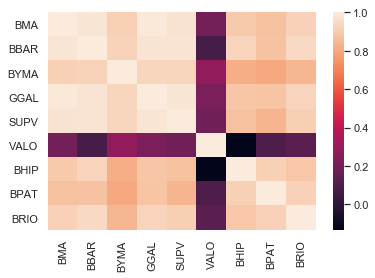

In [168]:
sns.heatmap(DB.corr())


No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

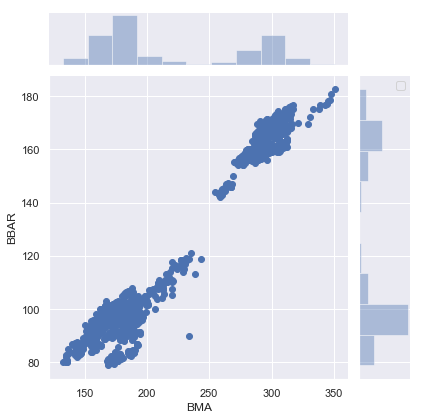

In [169]:
#Creating a scatter plot using Seaborn
plt.figure(figsize=(15,10))
sns.jointplot(DB['BMA'],DB['BBAR'])
plt.legend(loc=0)
plt.show()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

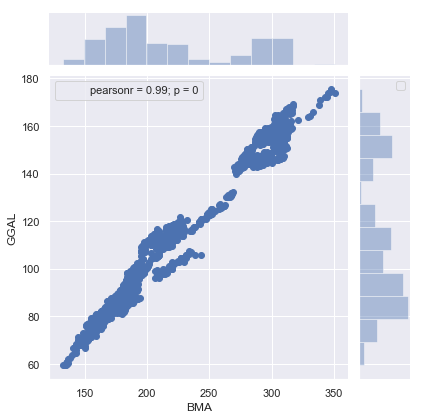

In [170]:
plt.figure(figsize=(15,10))
j = sns.jointplot(DB['BMA'],DB['GGAL'])
j.annotate(stats.pearsonr)
plt.legend(loc=0)
plt.show()

Trabajo sobre dos stocks: BMA y GGAL

In [171]:
BMA.loc["2019-10-18 11:00:00":"2019-10-18 17:00:00"]

,BMA
tradetime,
2019-10-18 12:00:00,188.00
2019-10-18 12:30:00,186.65
2019-10-18 13:00:00,190.20
2019-10-18 13:30:00,188.35
2019-10-18 14:00:00,188.35
2019-10-18 14:30:00,188.35
2019-10-18 15:00:00,189.00
2019-10-18 15:30:00,189.00
2019-10-18 16:00:00,188.85


In [172]:
BMA["BMA"].loc["2019-10-18 13:30:00":"2019-10-18 14:00:00"]=BMA["BMA"].loc["2019-10-18 13:00:00"]

In [173]:
GGAL.loc["2019-10-18 11:00:00":"2019-10-18 17:00:00"]

,GGAL
tradetime,
2019-10-18 12:00:00,91.15
2019-10-18 12:30:00,92.45
2019-10-18 13:00:00,92.90
2019-10-18 13:30:00,93.00
2019-10-18 14:00:00,93.00
2019-10-18 14:30:00,93.00
2019-10-18 15:00:00,93.00
2019-10-18 15:30:00,93.55
2019-10-18 16:00:00,94.20


In [174]:
GGAL["GGAL"].loc["2019-10-18 13:30:00":"2019-10-18 14:00:00"]=GGAL["GGAL"].loc["2019-10-18 13:00:00"]

In [175]:
DB["BMA"].loc["2019-10-18 13:30:00":"2019-10-18 14:00:00"]=BMA["BMA"].loc["2019-10-18 13:00:00"]
DB["GGAL"].loc["2019-10-18 13:30:00":"2019-10-18 14:00:00"]=GGAL["GGAL"].loc["2019-10-18 13:00:00"]

In [176]:
import statsmodels.api as sm

In [177]:
model = sm.OLS(DB["BMA"].iloc[1:1500], DB["GGAL"].iloc[1:1500])

In [178]:
model = model.fit()

In [179]:
print(model.params)

GGAL    1.968075
dtype: float64


In [180]:
#adding the spread column to the nemDF dataframe
BMAGGAL = DB[["BMA", "GGAL"]]
#hay un dato menos en ggal
BMAGGAL.dropna(axis = 0, inplace = True)
BMAGGAL['spread']=BMAGGAL['BMA'] -  1.968056 * BMAGGAL['GGAL']
BMAGGAL.dropna(inplace = True)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [181]:
BMAGGAL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1697 entries, 2019-05-02 12:30:00 to 2019-11-28 15:30:00
Data columns (total 3 columns):
BMA       1697 non-null float64
GGAL      1697 non-null float64
spread    1697 non-null float64
dtypes: float64(3)
memory usage: 53.0 KB


In [182]:
BMAGGAL[BMAGGAL["spread"] == np.inf]

,BMA,GGAL,spread
tradetime,,,


In [183]:
BMAGGAL.loc["2019-10-18 11:00:00":"2019-10-18 17:00:00"]

,BMA,GGAL,spread
tradetime,,,
2019-10-18 12:00:00,188.00,91.15,8.611696
2019-10-18 12:30:00,186.65,92.45,4.703223
2019-10-18 13:00:00,190.20,92.90,7.367598
2019-10-18 13:30:00,190.20,92.90,7.367598
2019-10-18 14:00:00,190.20,92.90,7.367598
2019-10-18 14:30:00,188.35,93.00,5.320792
2019-10-18 15:00:00,189.00,93.00,5.970792
2019-10-18 15:30:00,189.00,93.55,4.888361
2019-10-18 16:00:00,188.85,94.20,3.459125


In [184]:
#instantiating the adfuller test
adf=adfuller(BMAGGAL['spread'])
print(adf)

(-2.6086068670321967, 0.09123141884342906, 13, 1683, {'1%': -3.4342414449790506, '5%': -2.863258853167956, '10%': -2.5676850737037284}, 6751.97723369469)


In [185]:
#Logic that states if our test statistic is less than
#a specific critical value, then the pair is cointegrated at that
#level, else the pair is not cointegrated
if adf[0] < adf[4]['1%']:
        print('Spread is Cointegrated at 1% Significance Level')
elif adf[0] < adf[4]['5%']:
        print('Spread is Cointegrated at 5% Significance Level')
elif adf[0] < adf[4]['10%']:
        print('Spread is Cointegrated at 10% Significance Level')    
else:
        print('Spread is not Cointegrated')

Spread is Cointegrated at 10% Significance Level


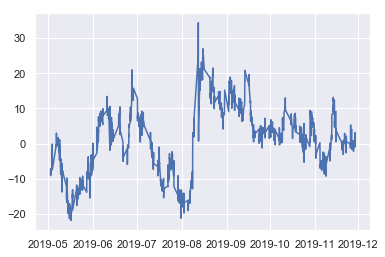

In [186]:
plt.plot(BMAGGAL["spread"])
plt.show()

In [187]:
BMAGGAL["up_boll"] = ta.bollinger_hband(BMAGGAL['spread'], n=20, ndev=1, fillna=False)
BMAGGAL["low_boll"] = ta.bollinger_lband(BMAGGAL['spread'], n=20, ndev=1, fillna=False)
BMAGGAL["MA20"] = BMAGGAL["spread"].rolling(window=20).mean()
BMAGGAL.dropna(axis=0, inplace=True)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [188]:
BMAGGAL["up_boll"]

tradetime
2019-05-03 16:00:00   -4.064573
2019-05-03 16:30:00   -3.536305
2019-05-03 17:00:00   -3.112043
2019-05-03 17:30:00   -2.536641
2019-05-03 18:00:00   -2.536252
2019-05-06 12:00:00   -2.041918
2019-05-06 12:30:00   -1.683269
2019-05-06 13:00:00   -1.137147
2019-05-06 13:30:00   -0.549632
2019-05-06 14:00:00    0.135287
2019-05-06 15:00:00    0.536937
2019-05-06 15:30:00    0.963755
2019-05-06 16:00:00    1.228506
2019-05-06 16:30:00    1.367664
2019-05-06 17:00:00    1.495960
2019-05-06 17:30:00    1.597233
2019-05-06 18:00:00    1.699213
2019-05-07 12:00:00    1.785005
2019-05-07 12:30:00    1.953948
2019-05-07 13:00:00    2.069437
2019-05-07 13:30:00    2.199081
2019-05-07 14:00:00    2.289864
2019-05-07 14:30:00    2.399297
2019-05-07 15:00:00    2.449870
2019-05-07 15:30:00    1.791299
2019-05-07 16:00:00    1.832828
2019-05-07 16:30:00    1.815280
2019-05-07 17:00:00    1.865603
2019-05-07 17:30:00    1.797492
2019-05-07 18:00:00    1.530335
                         ...  

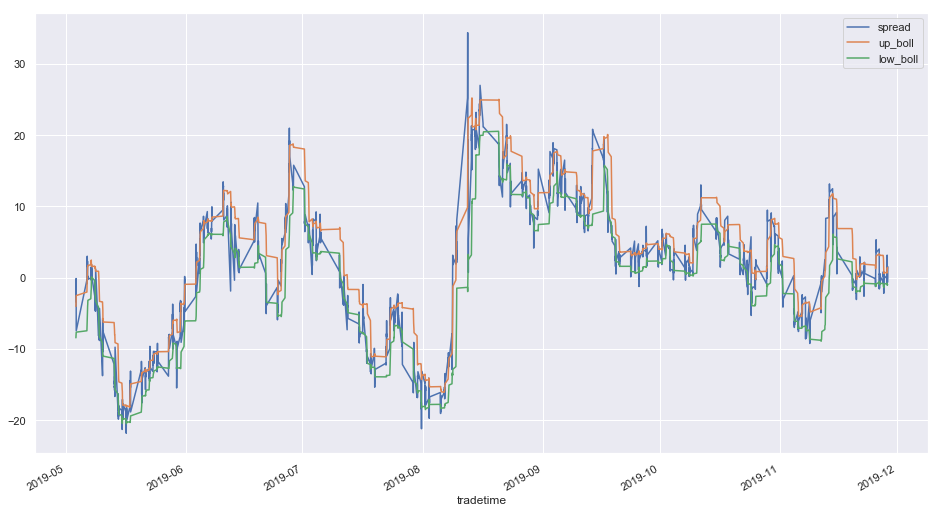

In [189]:
BMAGGAL[["spread", "up_boll", "low_boll"]].plot(figsize=[16,9])

In [190]:
BMAGGAL['long_entry'] = BMAGGAL["spread"] < BMAGGAL["low_boll"]
#& (BMAGGAL["spread"].shift(1) >= BMAGGAL["low_boll"].shift(1) 
                        
BMAGGAL['long_exit'] = BMAGGAL["spread"] >= BMAGGAL["MA20"]
#& (BMAGGAL["spread"].shift(1) < BMAGGAL["MA20"].shift(1))
                       
BMAGGAL['positions_long'] = np.nan
BMAGGAL.loc[BMAGGAL['long_entry'],'positions_long'] = 1
BMAGGAL.loc[BMAGGAL['long_exit'],'positions_long'] = 0 
BMAGGAL['positions_long'] = BMAGGAL['positions_long'].fillna(method='ffill')

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [191]:
BMAGGAL['short_entry'] = BMAGGAL["spread"] > BMAGGAL["up_boll"]
BMAGGAL['short_exit'] = BMAGGAL["spread"] <= BMAGGAL["MA20"]
BMAGGAL['positions_short'] = np.nan
BMAGGAL.loc[BMAGGAL['short_entry'],'positions_short'] = 1
BMAGGAL.loc[BMAGGAL['short_exit'],'positions_short'] = 0 
BMAGGAL['positions_short'] = BMAGGAL['positions_short'].fillna(method='ffill')

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
BMAGGAL['positions'] = BMAGGAL.positions_long + BMAGGAL.positions_short

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
BMAGGAL

,BMA,GGAL,spread,up_boll,low_boll,MA20,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions
tradetime,,,,,,,,,,,,,
2019-05-03 16:00:00,211.50,109.20,-3.411715,-4.064573,-8.468021,-6.266297,False,True,0.0,True,False,1.0,1.0
2019-05-03 16:30:00,213.80,109.35,-1.406924,-3.536305,-8.258018,-5.897162,False,True,0.0,True,False,1.0,1.0
2019-05-03 17:00:00,214.25,109.75,-1.744146,-3.112043,-8.021884,-5.566964,False,True,0.0,True,False,1.0,1.0
2019-05-03 17:30:00,215.95,109.80,-0.142549,-2.536641,-7.698648,-5.117645,False,True,0.0,True,False,1.0,1.0
2019-05-03 18:00:00,197.20,104.00,-7.477824,-2.536252,-7.672648,-5.104450,False,False,0.0,False,True,0.0,0.0
2019-05-06 12:00:00,213.00,108.40,-0.337270,-2.041918,-7.478934,-4.760426,False,True,0.0,True,False,1.0,1.0
2019-05-06 12:30:00,216.00,110.20,-0.879771,-1.683269,-7.056180,-4.369725,False,True,0.0,True,False,1.0,1.0
2019-05-06 13:00:00,218.00,110.25,1.021826,-1.137147,-6.654143,-3.895645,False,True,0.0,True,False,1.0,1.0
2019-05-06 13:30:00,217.00,109.40,1.694674,-0.549632,-6.340415,-3.445024,False,True,0.0,True,False,1.0,1.0


In [194]:
BMAGGAL['r_BMA'] = BMAGGAL.BMA.pct_change()
BMAGGAL["r_GGAL"] = BMAGGAL.GGAL.pct_change()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
BMAGGAL['pnl'] = BMAGGAL.positions_long.shift(1) * (BMAGGAL['r_BMA'] -  1.968056 * BMAGGAL['r_GGAL']) + \
                 BMAGGAL.positions_short.shift(1) * (- BMAGGAL['r_BMA'] +  1.968056 * BMAGGAL['r_GGAL'])

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [196]:
BMAGGAL['cumpnl'] = BMAGGAL.pnl.cumsum()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


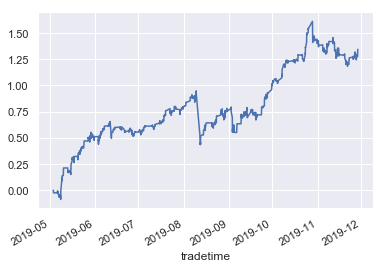

In [197]:
BMAGGAL['cumpnl'].plot()

In [198]:
BMAGGAL["hold_BMA"] = BMAGGAL['r_BMA'].cumsum()
BMAGGAL["hold_GGAL"] = BMAGGAL['r_GGAL'].cumsum()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


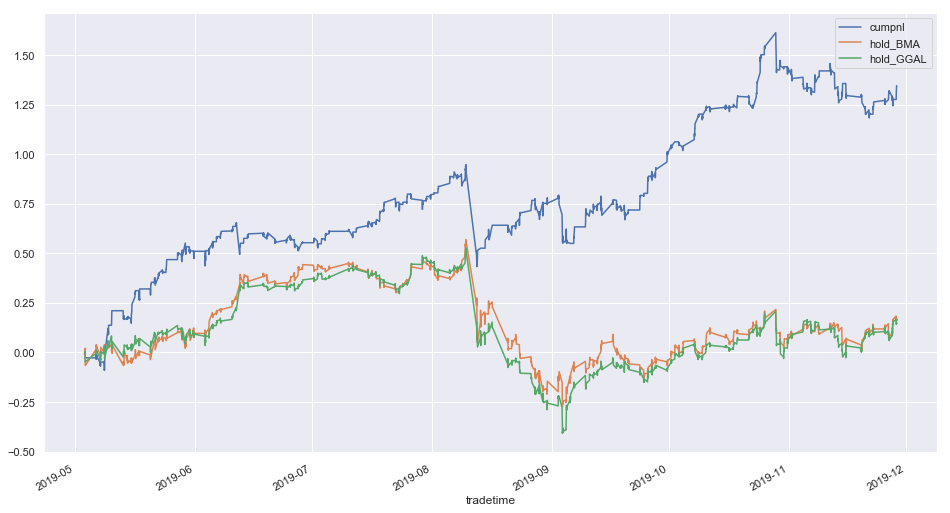

In [199]:
plt.figure(figsize = (16,9))
BMAGGAL['cumpnl'].plot()
BMAGGAL["hold_BMA"].plot()
BMAGGAL["hold_GGAL"].plot()
plt.legend()

In [200]:
BMAGGAL.head()

,BMA,GGAL,spread,up_boll,low_boll,MA20,long_entry,long_exit,positions_long,short_entry,short_exit,positions_short,positions,r_BMA,r_GGAL,pnl,cumpnl,hold_BMA,hold_GGAL
tradetime,,,,,,,,,,,,,,,,,,,
2019-05-03 16:00:00,211.50,109.20,-3.411715,-4.064573,-8.468021,-6.266297,False,True,0.0,True,False,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-03 16:30:00,213.80,109.35,-1.406924,-3.536305,-8.258018,-5.897162,False,True,0.0,True,False,1.0,1.0,0.010875,0.001374,-0.008171,-0.008171,0.010875,0.001374
2019-05-03 17:00:00,214.25,109.75,-1.744146,-3.112043,-8.021884,-5.566964,False,True,0.0,True,False,1.0,1.0,0.002105,0.003658,0.005094,-0.003077,0.012979,0.005032
2019-05-03 17:30:00,215.95,109.80,-0.142549,-2.536641,-7.698648,-5.117645,False,True,0.0,True,False,1.0,1.0,0.007935,0.000456,-0.007038,-0.010115,0.020914,0.005487
2019-05-03 18:00:00,197.20,104.00,-7.477824,-2.536252,-7.672648,-5.104450,False,False,0.0,False,True,0.0,0.0,-0.086826,-0.052823,-0.017134,-0.027249,-0.065912,-0.047336


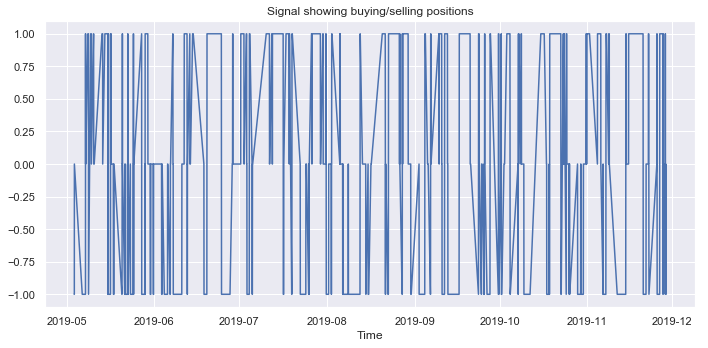

In [201]:
# Alternate way to plot the graph
Position = BMAGGAL['positions_long'] - BMAGGAL['positions_short']
plt.figure(figsize=(10, 5))
plt.plot(Position)
plt.title("Signal showing buying/selling positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [202]:
benchmark_return_BMA = BMAGGAL["hold_BMA"].loc['2019-11-28 15:00:00']
benchmark_return_GGAL = BMAGGAL["hold_GGAL"].loc['2019-11-28 15:00:00']
strategy_return = BMAGGAL['cumpnl'].loc["2019-11-28 15:00:00"]
volatility = BMAGGAL["pnl"].std() * np.sqrt(len(BMAGGAL["pnl"]))
sharpe = strategy_return / volatility
print('Benchmark BMA:', benchmark_return_BMA)
print('Benchmark GGAL:', benchmark_return_GGAL)
print('Strategy Return:', strategy_return)
print('Volatility:', volatility)
print('Sharpe Ratio:', sharpe)
    

Benchmark BMA: 0.16163129214788374
Benchmark GGAL: 0.15013281383487986
Strategy Return: 1.3460036220308245
Volatility: 0.7091764487613115
Sharpe Ratio: 1.8979812772714493


/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


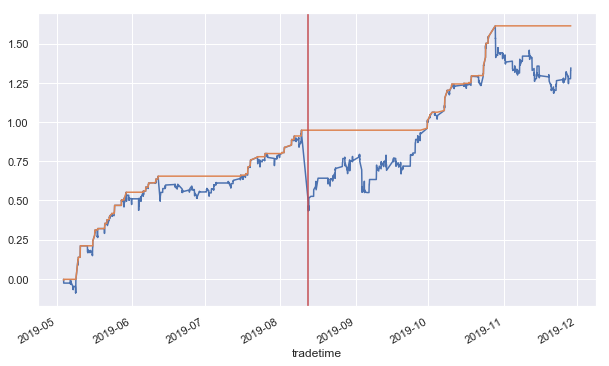

In [203]:
#Maximum Drawdown
BMAGGAL['max'] = BMAGGAL["cumpnl"].cummax()
BMAGGAL['drawdown'] = BMAGGAL['max'] - BMAGGAL['pnl'].cumsum()
max(BMAGGAL['drawdown'])
t = BMAGGAL['drawdown'].idxmax()
ax = BMAGGAL['cumpnl'].plot(figsize=(10, 6))
BMAGGAL['max'].plot(ax=ax)
plt.axvline(t, c='r');

In [204]:
# median of long positions, in minutes
time_median_positions_long =(BMAGGAL["positions_long"].sum() / BMAGGAL["long_exit"].sum())
print (time_median_positions_long)

0.8046683046683046


In [205]:
def tsplot(y, lags=None, figsize=(10, 8), style='seaborn-bright'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax, linewidth=1.5)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        
        plt.tight_layout()
    
    return

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


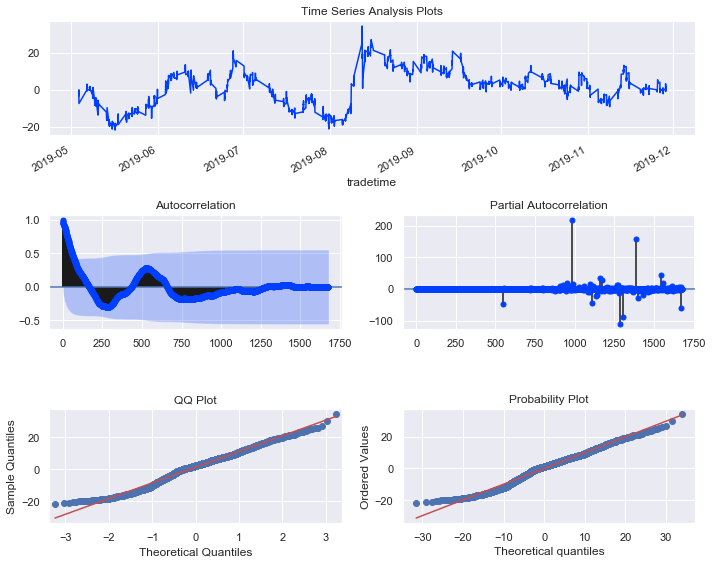

In [206]:
tsplot(BMAGGAL["spread"])

# Extensión del Modelo

In [207]:
stock_data = DB

In [225]:

def pairtrade(stock_1 = None, stock_2 = None):
    if not stock_data.empty:
        model = sm.OLS(stock_data[stock_1].iloc[-1200:], stock_data[stock_2].iloc[-1200:],hastconst = False)
        print (model.fit().summary())
        portfolio_parameter = float(model.fit().params)
        stock_data["spread"] = stock_data[stock_1] - portfolio_parameter * stock_data[stock_2]
        adf = adfuller(stock_data["spread"])
        if adf[0] > adf[4]["10%"]:
            print("No son cointegrados!")
        elif adf[0] < adf[4]["10%"]:
            tsplot(stock_data["spread"])

In [226]:
stock_data.ffill(inplace = True)

In [227]:
stock_data.dropna(inplace = True)

In [228]:
pairtrade("BMA", "GGAL")

                            OLS Regression Results                            
Dep. Variable:                    BMA   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.162e+05
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:15:59   Log-Likelihood:                -4420.3
No. Observations:                1200   AIC:                             8843.
Df Residuals:                    1199   BIC:                             8848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GGAL           1.9762      0.003    784.973      0.0